# Boston House Prediction Using Multiple Linear Regression

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Boston House dataset into pandas dataframe

Attribute Information:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [2]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [8]:
boston['data'].shape

(506, 13)

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
df = pd.DataFrame(data = boston['data'], columns= boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Quick EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


No missing value or data type looks normal

In [16]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

To simplify the analysis process, look for null percentages, unique values, and unique examples.

In [17]:
pd.DataFrame(data = bsDesc,
columns = [
    'Features',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,Features,Null,NullPercentage,Unique,Unique Sample
0,CRIM,0,0.0,504,"[4.26131, 0.08447]"
1,ZN,0,0.0,26,"[33.0, 25.0]"
2,INDUS,0,0.0,76,"[2.18, 1.22]"
3,CHAS,0,0.0,2,"[0.0, 1.0]"
4,NOX,0,0.0,81,"[0.46, 0.4161]"
5,RM,0,0.0,446,"[5.741, 6.25]"
6,AGE,0,0.0,356,"[49.7, 53.2]"
7,DIS,0,0.0,412,"[3.4217, 2.505]"
8,RAD,0,0.0,9,"[2.0, 3.0]"
9,TAX,0,0.0,66,"[352.0, 293.0]"


### Feature Selection

Create a boxplot to view the target distribution as a basis for determining the type of correlation

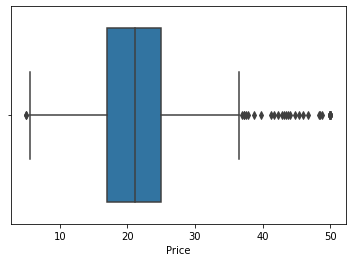

In [18]:
sns.boxplot(df['Price'])
plt.show()

Create a heatmap to drop features that have a low correlation with the target

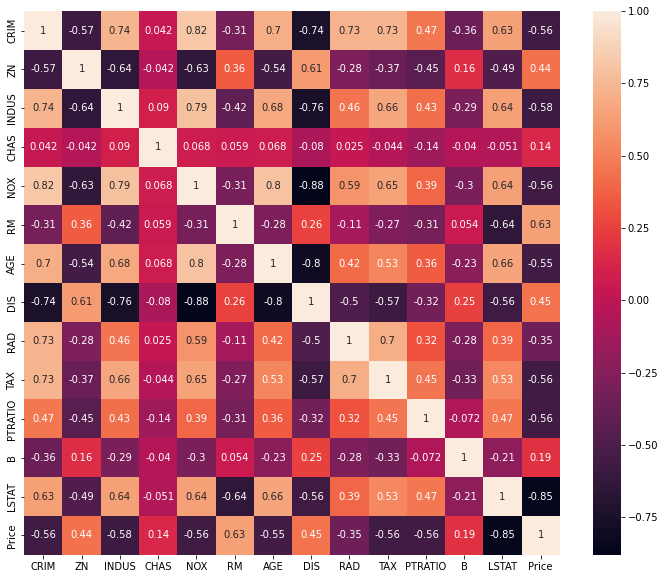

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

### Machine Learning Modelling

Create train data and test data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns='Price')
y = df['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=42)

Modelling

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
Model = LinearRegression()

In [25]:
Model.fit(X_train, y_train)

LinearRegression()

### Evaluation Matrix

Plot actual data and predicted data

In [26]:
pred_train = Model.predict(X_train)

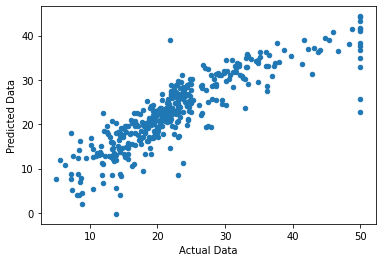

In [27]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [28]:
pred_test = Model.predict(X_test)

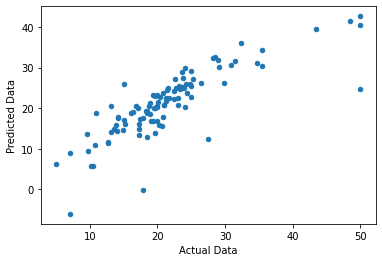

In [29]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [30]:

Training_set = pd.concat([X_train, y_train], axis = 1)

In [31]:
Testing_set = pd.concat([X_test, y_test], axis = 1)

Analyzing Error on Training Set

In [32]:
Training_set['price_pred'] = pred_train

In [33]:
Training_set['Error'] = abs(Training_set['Price'] - Training_set['price_pred'])

Plot to see the error distribution

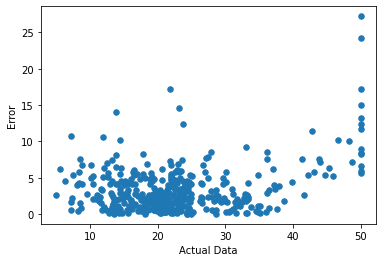

In [34]:
plt.scatter(Training_set['Price'], Training_set['Error'], s=30)
plt.xlabel("Actual Data")
plt.ylabel("Error")
plt.show()

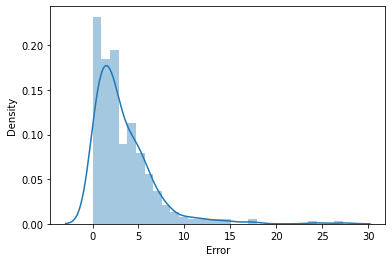

In [35]:
sns.distplot(Training_set['Error'])
plt.show()

In [36]:
Training_set['Error'].mean()

3.3147716267832252

In [37]:
Training_set.sort_values('Error', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,price_pred,Error
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,22.766670,27.233330
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,25.710560,24.289440
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,39.115218,17.215218
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,32.811316,17.188684
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,35.008339,14.991661
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,8.483748,14.616252
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8,-0.205882,14.005882
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,36.759592,13.240408
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,37.590669,12.409331
214,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7,11.351153,12.348847


Drop data that has a value of TAX = 666

In [49]:
df = df[df['TAX'] != 666]

Project Limitation : There is no value of 666 in the tax feature

### Evaluation Matrix

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    r2_tr = r2_score(y_train, y_pred_train)
    mae_tr = mean_absolute_error(y_train, y_pred_train)
    mse_tr = mean_squared_error(y_train, y_pred_train)
    rmse_tr = np.sqrt(mse_tr)
    y_pred_test = Model.predict(X_test)
    r2_ts = r2_score(y_test, y_pred_test)
    mae_ts = mean_absolute_error(y_test, y_pred_test)
    mse_ts = mean_squared_error(y_test, y_pred_test)
    rmse_ts = np.sqrt(mse_ts)
    data_LR = {
    Nama + " Training" : [round(r2_tr,2), round(mae_tr,2), round(mse_tr,2), round(rmse_tr,2)],
    Nama + " Testing"  : [round(r2_ts,2), round(mae_ts,2), round(mse_ts,2), round(rmse_ts,2)],
}

    df_eva = pd.DataFrame(data_LR, index=["R2_Score", "MAE", "MSE", "RMSE"])
    return df_eva

In [52]:
df_eva_base_model = Eva_Matrix_Base_Class(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear Regression')

In [53]:
df_eva_base_model

,Linear Regression Training,Linear Regression Testing
R2_Score,0.75,0.67
MAE,3.31,3.19
MSE,21.64,24.29
RMSE,4.65,4.93


Conclusion:

From the results of matrix evaluation, machine learning modeling on boston house price prediction data using linear regression method is still underfitting